In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

import os
import glob
import re
import torch

In [2]:
best_overall_params = {}

In [3]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_lora_lr = None

# Find all grid_results joblib files in the results folder
pattern = r'grid_results_\d+_[\d.e+-]+\.pt'


# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern
result_files = [file for file in result_files if re.search(pattern, file)]
# print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = torch.load(file_path, map_location=torch.device('cpu'))
    
    key = next(iter(result.keys()))
    # print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_lora_lr = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_lora_lr}")
print(f"{'='*50}")

best_overall_params['lora_rank'] = best_lora_lr[0]
best_overall_params['learning_rate'] = best_lora_lr[1]


Best validation loss: 0.612883274157842
Best file: (8, 0.0001)


/tmp/ipykernel_3428900/952399239.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load(file_path, map_location=torch.device('cpu'))


In [4]:
all_train_loss

[[[5.851937294006348, 0],
  [2.1736643314361572, 1],
  [3.552166700363159, 2],
  [5.2564005851745605, 3],
  [1.7039438486099243, 4],
  [0.978936493396759, 5],
  [3.560589075088501, 6],
  [3.7863759994506836, 7],
  [1.7139006853103638, 8],
  [1.70012366771698, 9],
  [3.76176381111145, 10],
  [3.531306028366089, 11],
  [5.648458957672119, 12],
  [5.054760932922363, 13],
  [3.0896198749542236, 14],
  [3.013052463531494, 15],
  [4.807478904724121, 16],
  [3.642974376678467, 17],
  [1.0333095788955688, 18],
  [0.9725847840309143, 19],
  [1.6424342393875122, 20],
  [1.5105148553848267, 21],
  [3.0069427490234375, 22],
  [1.1803950071334839, 23],
  [3.0070362091064453, 24],
  [2.832801580429077, 25],
  [2.938220739364624, 26],
  [2.291010618209839, 27],
  [4.8736653327941895, 28],
  [1.8757444620132446, 29],
  [3.548431873321533, 30],
  [3.561229705810547, 31],
  [3.515437602996826, 32],
  [4.8232574462890625, 33],
  [2.7720038890838623, 34],
  [4.8946614265441895, 35],
  [5.371189117431641, 

In [5]:
all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)
all_keys = np.array(all_keys)

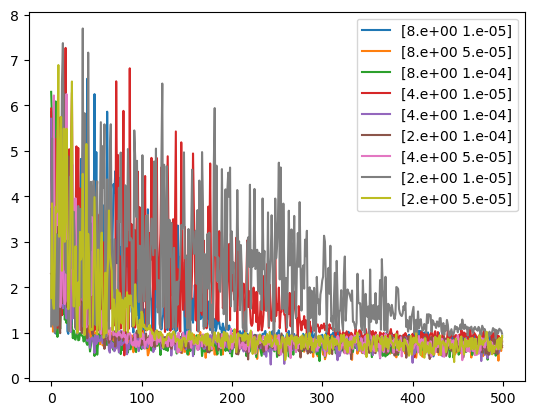

In [6]:
fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

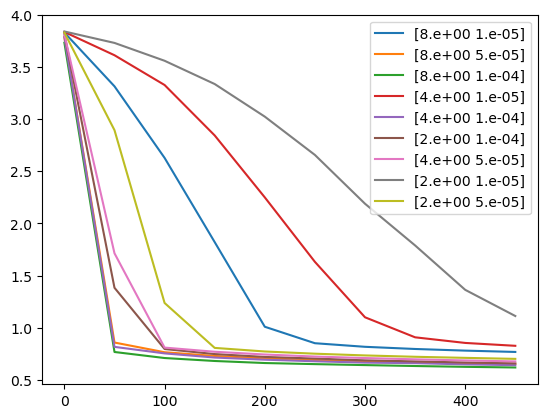

In [7]:
fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

In [8]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_ctx = None

# Pattern to match files of the form grid_results_NUMBER.joblib
pattern = r'grid_results_\d+\.pt'

# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern (just one number after grid_results_)
result_files = [file for file in result_files if re.search(pattern, file)]

# print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = torch.load(file_path, map_location=torch.device('cpu'))
    
    key = next(iter(result.keys()))
    print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_ctx = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_ctx}")
print(f"{'='*50}")

best_overall_params['max_ctx_length'] = best_ctx

Key: 768:  0.6096455448865891
Key: 128:  0.8473008425235748
Key: 512:  0.6119877982139588

Best validation loss: 0.6096455448865891
Best file: 768


/tmp/ipykernel_3428900/4168715624.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load(file_path, map_location=torch.device('cpu'))


In [9]:
all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)

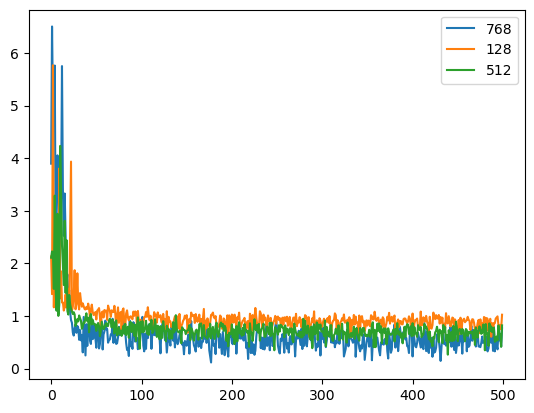

In [10]:
fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

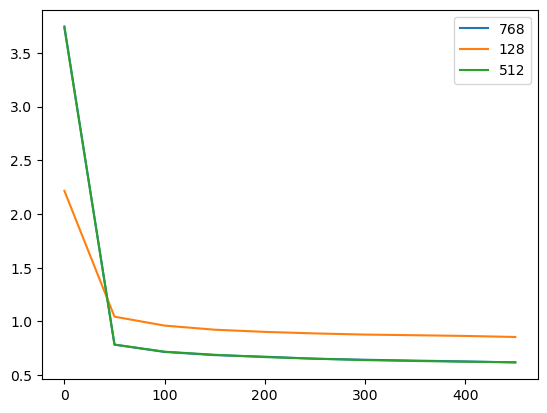

In [11]:
fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

In [12]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_schedule = None

# Pattern to match files of the form grid_results_WORDS.joblib
pattern = r'grid_results_[a-zA-Z]+\.pt'

# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern (just one number after grid_results_)
result_files = [file for file in result_files if re.search(pattern, file)]

# print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = torch.load(file_path, map_location=torch.device('cpu'))
    
    key = next(iter(result.keys()))
    # print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_schedule = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_schedule}")
print(f"{'='*50}")

best_overall_params['scheduler_choice'] = best_schedule


Best validation loss: 1000
Best file: None


In [13]:
all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


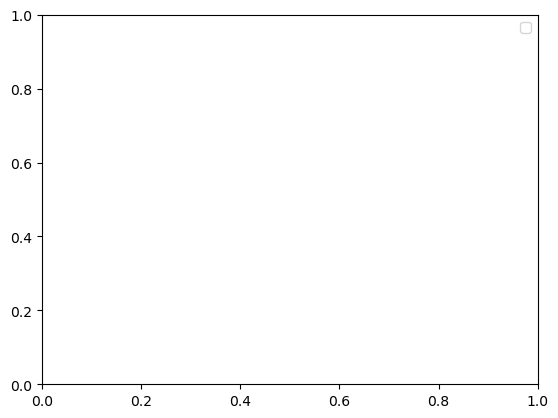

In [14]:
fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


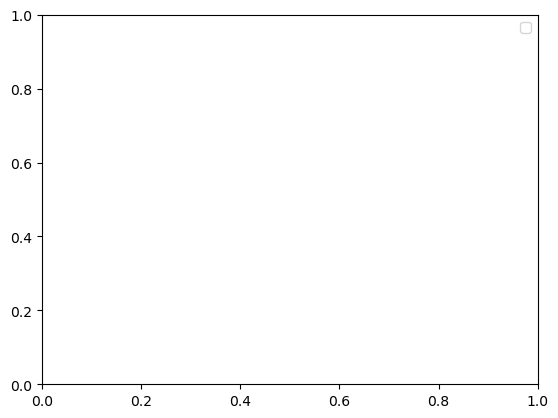

In [15]:
fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

In [ ]:
# joblib.dump(best_overall_params, "best_overall_params.joblib")

['best_overall_params.joblib']

In [ ]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_ctx = None

# Pattern to match files of the form grid_results_NUMBER.joblib
pattern = r'lora_run.*\.pt'

# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern (just one number after grid_results_)
result_files = [file for file in result_files if re.search(pattern, file)][0]

print(result_files)

result = torch.load(result_files, map_location=torch.device('cpu'))

train_loss = result['train_losses']
val_loss = result['val_losses']
prediction_decoded = result['prediction_decoded']
test_decoded = result['test_decoded']
metrics = result['metrics']



../results/lora_run_CSD3.pt


/tmp/ipykernel_3428900/2027812232.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load(result_files, map_location=torch.device('cpu'))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


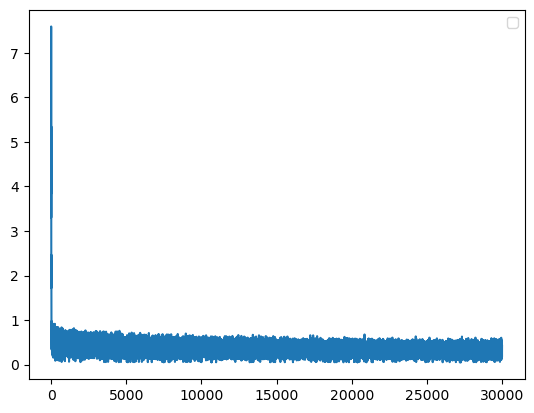

In [27]:
fig, ax = plt.subplots()
ax.plot(train_loss[:, 1], train_loss[:, 0])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


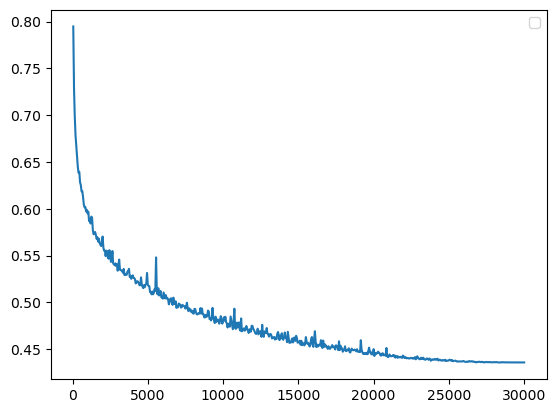

In [28]:
fig, ax = plt.subplots()
ax.plot(val_loss[:, 1], val_loss[:, 0])
plt.legend()
plt.show()

In [29]:
from preprocessor import get_dataset

/home/lj441/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/lj441/.conda/envs/project/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lj441/.conda/envs/project/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


In [30]:
_, _, times = get_dataset()

In [25]:
result

{'train_losses': array([[3.85186291e+00, 0.00000000e+00],
        [5.13174820e+00, 1.00000000e+00],
        [7.59536648e+00, 2.00000000e+00],
        ...,
        [3.40404391e-01, 2.99980000e+04],
        [2.29872122e-01, 2.99990000e+04],
        [4.18177307e-01, 3.00000000e+04]]),
 'val_losses': array([[7.94698920e-01, 5.00000000e+01],
        [7.28658202e-01, 1.00000000e+02],
        [6.98394786e-01, 1.50000000e+02],
        ...,
        [4.35889524e-01, 2.99000000e+04],
        [4.35889585e-01, 2.99500000e+04],
        [4.35889627e-01, 3.00000000e+04]]),
 'prediction_decoded': (array([1.621, 1.646, 1.822, 2.146, 2.623, 3.254, 4.024, 4.886, 5.753,
         6.506, 7.019, 7.185, 6.95 , 6.342, 5.481, 4.551, 3.73 , 3.125,
         2.752, 2.583, 2.581, 2.721, 2.982, 3.349, 3.801, 4.304, 4.808,
         5.254, 5.577, 5.723, 5.665, 5.41 , 5.006, 4.529, 4.059, 3.661,
         3.374, 3.21 , 3.165, 3.227, 3.381, 3.61 , 3.893, 4.203, 4.508,
         4.772, 4.96 , 5.049, 5.024, 4.891, 4.675, 4.4